## Load three datasets

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
def load_datasets(*filepaths):
    dataframes = []
    for path in filepaths:
        try:
            df = pd.read_csv(path)
            dataframes.append(df)
        except Exception as e:
            print(f"Error loading {path}: {e}")
            dataframes.append(None)
    return dataframes

In [57]:
file_1 = '../data/benin_clean.csv'
file_2 = '../data/togo_clean.csv'
file_3 = '../data/sierraleone_clean.csv'
df_benin, df_togo, df_sierraleone = load_datasets(file_1, file_2, file_3)

df_benin['Country'] = 'Benin'
df_togo['Country'] = 'Togo'
df_sierraleone['Country'] = 'Sierra Leone'

### Concatinating all three datasets

In [60]:
df = pd.concat([df_benin, df_togo, df_sierraleone], ignore_index=True)

## Metric Comparison

### Boxplots of GHI, DNI, DHI

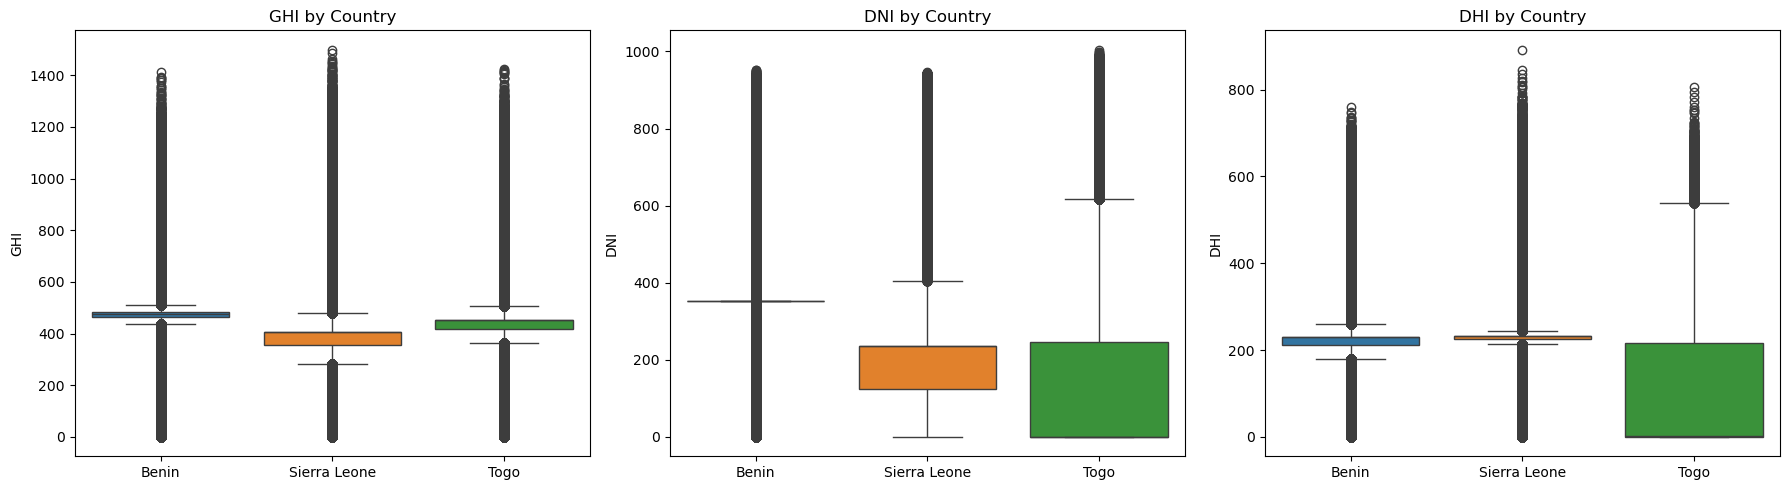

In [70]:
palette = {
    'Benin': '#1f77b4',
    'Sierra Leone': '#ff7f0e',
    'Togo': '#2ca02c'
}

metrics = ['GHI', 'DNI', 'DHI']
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

for i, metric in enumerate(metrics):
    sns.boxplot(
        x='Country',
        y=metric,
        hue='Country',
        data=df_all,
        ax=axes[i],
        palette=palette,
        dodge=False  
    )
    axes[i].set_title(f'{metric} by Country')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.show()

### Summary Table

In [73]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
display(summary)

GHI                                 DNI              \
                    mean      median         std        mean      median   
Country                                                                    
Benin         476.746489  476.746489  228.381555  352.575567  352.575567   
Sierra Leone  406.239777  406.239777  216.394826  236.240484  236.240484   
Togo          454.081218  454.081218  227.947498  151.258469    0.000000   

                                 DHI                          
                     std        mean      median         std  
Country                                                       
Benin         193.411273  230.808498  230.808498  107.140793  
Sierra Leone  183.914983  232.837959  232.837959  105.366834  
Togo          250.956962  116.444352    2.500000  156.520714

## Statistical Testing

In [76]:
ghi_groups = [df_benin['GHI'], df_sierraleone['GHI'], df_togo['GHI']]
stat, p = f_oneway(*ghi_groups)
print(f"ANOVA result: p = {p:.4f}")
if p < 0.05:
    print("Significant difference in GHI across countries.")
else:
   print("No significant difference in GHI across countries.")


ANOVA result: p = 0.0000
Significant difference in GHI across countries.


In [91]:
ghi_benin = df_all[df_all['Country'] == 'Benin']['GHI']
ghi_sl = df_all[df_all['Country'] == 'Sierra Leone']['GHI']
ghi_togo = df_all[df_all['Country'] == 'Togo']['GHI']

# One-way ANOVA (parametric)
anova_stat, anova_p = f_oneway(ghi_benin, ghi_sl, ghi_togo)

# Kruskal-Wallis H-test (non-parametric)
kw_stat, kw_p = kruskal(ghi_benin, ghi_sl, ghi_togo)

# Print p-values
print(f"ANOVA p-value: {anova_p:.4f}")
print(f"Kruskal-Wallis p-value: {kw_p:.4f}")

ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000


### Key Observations

- Benin shows the highest median GHI and also the widest variability.
- Sierra Leone has the lowest overall DNI values.
- Togo’s DHI values are more stable compared to the other two countries.


## Visual Summary

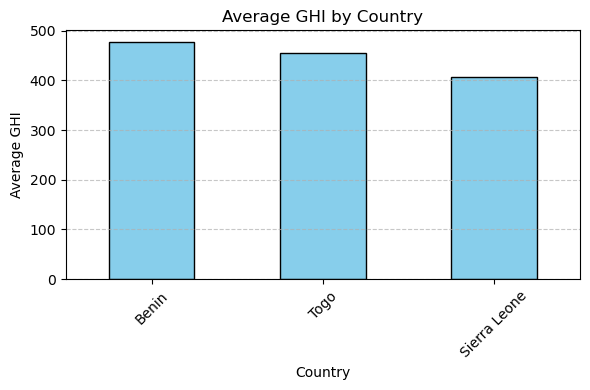

In [95]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
# Plot bar chart
plt.figure(figsize=(6, 4))
avg_ghi.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()